In [2]:
from sympy import *
import numpy as np
import scipy.interpolate as scinter
import matplotlib.pyplot as plt

# zadanie 1


In [3]:
x = Symbol('x')

f = 1/ (1 + 25 * x ** 2)

f

1/(25*x**2 + 1)

In [4]:
der5 = f.diff(x, 5)
der10 = f.diff(x, 10)
der15 = f.diff(x, 15)

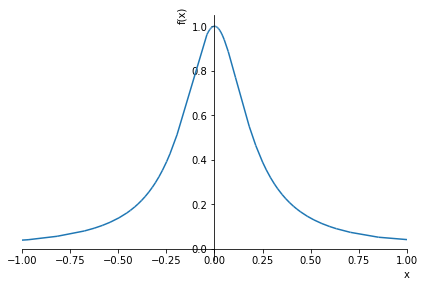

In [5]:
p0 = plot(f, xlim = (-1,1))

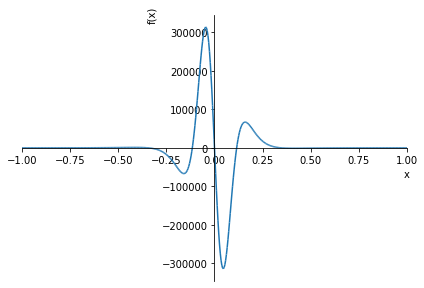

In [6]:
p5 = plot(der5, xlim = (-1,1), adaptive = False, nb_of_points = 5000)

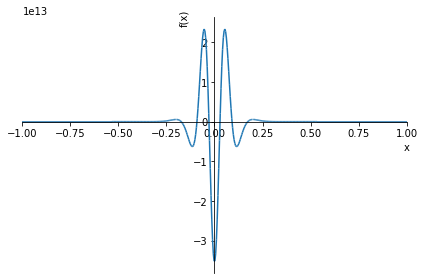

In [7]:
p10 = plot(der10, xlim = (-1,1), adaptive = False, nb_of_points = 5000)

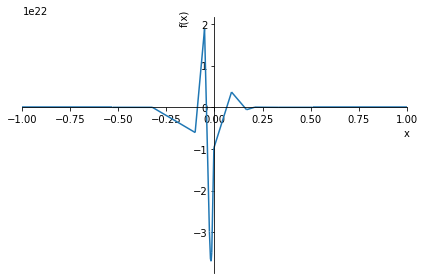

In [8]:
p15 = plot(der15, xlim = (-1,1))

In [9]:
def Newton_interpolation(f, n):
    lf = lambdify(x, f)

    points = np.linspace(-1, 1, num= n)
    f_interpolated = scinter.KroghInterpolator(points, lf(points))

    return f_interpolated, points

def Chebyshev_node_interpolation(f, n):
    lf = lambdify(x, f)

    points = np.zeros(n)
    for i in range(n):
        points[i] = cos((2*i + 1)/(2*(n+0)) * pi) ### ????? czemu zamiast 2(n+1) powinno byc 2(n)

    f_interpolated = scinter.KroghInterpolator(points, lf(points))

    return f_interpolated, points

def clamped_cubic_spline_interpolation(f, n):
    lf = lambdify(x, f)

    points = np.linspace(-1, 1, num= n, dtype= float)

    f_interpolated = scinter.CubicSpline(points, lf(points))

    return f_interpolated, points


def plot_interpolation(f, f_interpolated, points):
    lf = lambdify(x, f)
    d = np.linspace(-1, 1, num = 1000)

    plt.plot(d, f_interpolated(d))
    plt.plot(d, lf(d))
    plt.scatter(points, f_interpolated(points))
    plt.show()

In [10]:
def error_func(f, interpolated):
    lf = lambdify(x, f)
    return lambda p : abs(lf(p) - interpolated(p))

def plot_error_func(error_func):
    d = np.linspace(-1, 1, num = 1000)

    plt.plot(d, error_func(d))
    plt.show()

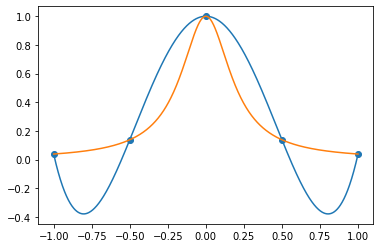

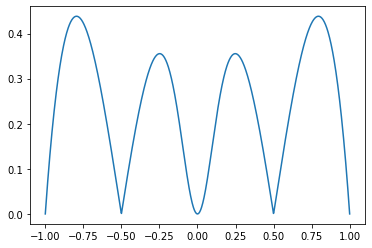

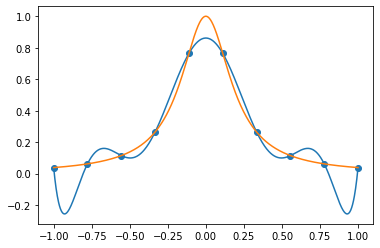

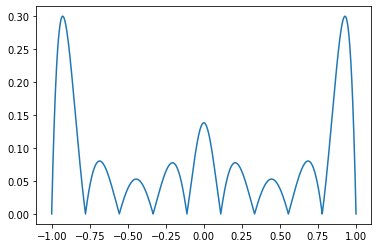

In [11]:
polyNewton5, points5 = Newton_interpolation(f, 5)
plot_interpolation(f, polyNewton5, points5)
plot_error_func(error_func(f,polyNewton5))

polyNewton10, points10 = Newton_interpolation(f, 10)
plot_interpolation(f, polyNewton10, points10)
plot_error_func(error_func(f,polyNewton10))

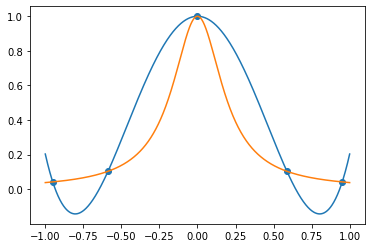

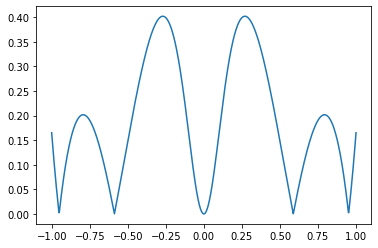

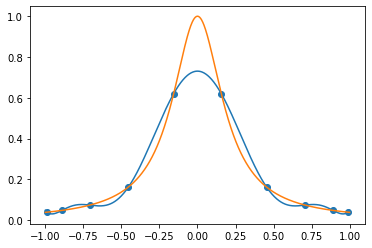

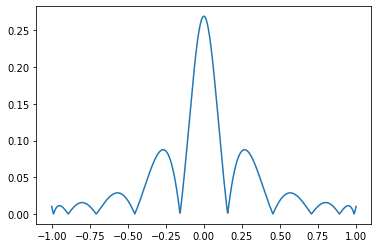

In [12]:
polyChebyshev5, points5 = Chebyshev_node_interpolation(f, 5)
plot_interpolation(f, polyChebyshev5, points5)
plot_error_func(error_func(f,polyChebyshev5))

polyChebyshev10, points10 = Chebyshev_node_interpolation(f, 10)
plot_interpolation(f, polyChebyshev10, points10)
plot_error_func(error_func(f,polyChebyshev10))

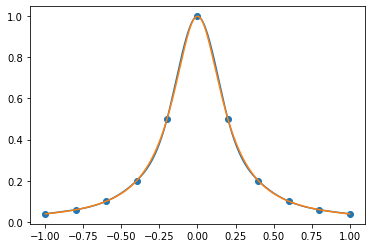

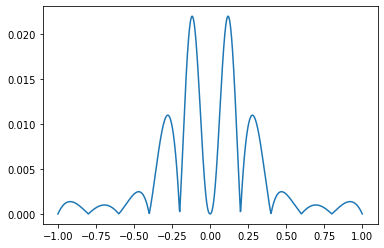

In [13]:
spline, points5 = clamped_cubic_spline_interpolation(f, 11)
plot_interpolation(f, spline, points5)
plot_error_func(error_func(f,spline))




In [33]:
from random import uniform

test_points = [uniform(-1,1) for _ in range(50)]
lf = lambdify(x, f)

Newton_errors = error_func(f, polyNewton10)
Chebyshev_errors = error_func(f, polyChebyshev10)
spline_errors = error_func(f, spline)

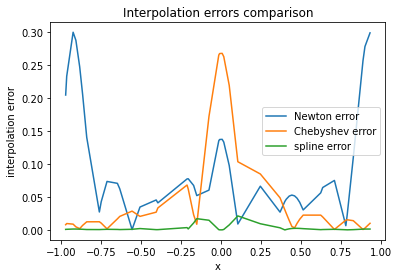

In [37]:
import pandas as pd

df = pd.DataFrame(columns=['x', 'f(x)', 'Newton', 'Chebyshev', 'spline', "Newton error", 'Chebyshev error', 'spline error'])

for i in range(len(test_points)):
    point = test_points[i]

    df.loc[i] = [point, lf(point), polyNewton10(point), polyChebyshev10(point), spline(point),
                 Newton_errors(point), Chebyshev_errors(point), spline_errors(point)]


ax = df.sort_values('x').plot(x = 'x', y = ['Newton error', 'Chebyshev error', 'spline error'])
ax.set_ylabel('interpolation error')
ax.set_title('Interpolation errors comparison')
plt.show()

In [36]:
df

,x,f(x),Newton,Chebyshev,spline,Newton error,Chebyshev error,spline error
0,0.399659,0.200273,0.15705513458788567,0.23075410528959692,0.20024373843640308,0.043218,0.030481,0.000029
1,0.900930,0.046966,-0.2315006110535921,0.04416407688625391,0.0482833537537498,0.278467,0.002802,0.001317
2,-0.506859,0.134723,0.09997585442550168,0.11415687086034834,0.13681102028668826,0.034747,0.020566,0.002088
3,0.460357,0.158775,0.1070396976204016,0.15571846899141942,0.1612170418859427,0.051736,0.003057,0.002442
4,-0.212332,0.470118,0.5475283863288947,0.5382799377768269,0.46659390992090355,0.077410,0.068162,0.003524
5,-0.839963,0.053653,-0.08686655623539839,0.06598460476993821,0.05428289552421375,0.140519,0.012332,0.000630
6,-0.884057,0.048688,-0.19898518793693484,0.05065773321329193,0.04988023266354088,0.247673,0.001970,0.001192
7,-0.075129,0.876341,0.8158816662498725,0.70406277471911,0.8910570040230943,0.060459,0.172278,0.014716
8,-0.204997,0.487663,0.565383437143596,0.5498825859080956,0.48613180894858915,0.077720,0.062219,0.001532
9,0.403615,0.197136,0.15231895694768313,0.22522190831519706,0.1974325672245748,0.044817,0.028086,0.000296
